In [1]:
#Import Liabraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Table of content:

## 1. Understanding the data:

* File opening
* Dimension and Data-types
* Check for Nullvalues : if present than perform imputation to handle null/missing values

## 2. Expolatory Data Analysis:

* Distribution of variables (mean, median, std)
* Relationship among different variables (correlation)
* Relationship of each variable w.r.t the target variable in the dataset.

## 3. Pre-Processing:

* Separate dependent variable and Independent variable
* Scaling of variables
* Handling Imbalanced Data
* Spliting Training and Testing data

## 4. Demand Analysis

* Demand v/s Supply
* Zone wise Demand
* Location wise Demand
* Regional zone wise Demand

## 5. Modeling:

* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor
* Extreme Gradient Boosting Regressor

# 1. Understanding The Data

In [2]:
#Opening the csv file

df=pd.read_csv('Data.csv')
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
#Dimension of dataset

print("This dataset contains {0} number of observation and {1} number of feature.".format(df.shape[0],df.shape[1]))

This dataset contains 25000 number of observation and 24 number of feature.


In [4]:
#Understanding the data-type for each columns present in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [5]:
#Checking for Null values,if present we have to handle it by imputation

df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

There are three colunms containing null values namely workers_num,wh_est_year and approved_wh_govt_certificate and the number
of null values present are 990,11881 and 908 respectively.

Before performing any imutation lets understand these three variables.

### 1. workers_num(Number of Worker)

Text(0.5, 0, 'Number of Worker')

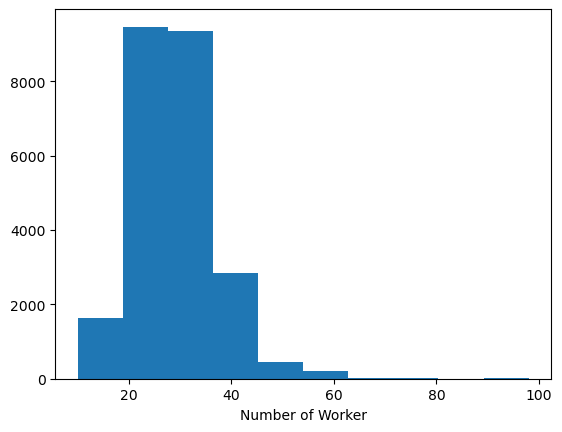

In [6]:
# Distribution of data in variable workers_num

plt.hist(df['workers_num'],bins=10)
plt.xlabel('Number of Worker')

Text(0, 0.5, 'Product Weight')

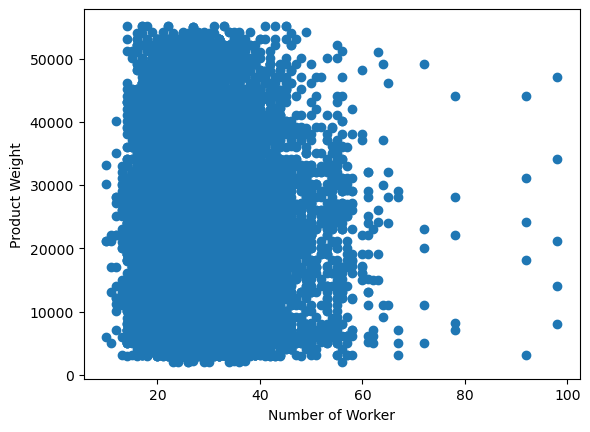

In [7]:
# Relation between Number of Worker and the target variable.

plt.scatter(df['workers_num'],df['product_wg_ton'])
plt.xlabel('Number of Worker')
plt.ylabel('Product Weight')

In [8]:
#checking mean for this field

df['workers_num'].mean()

28.944398167430236

* Its quite clear that most values in this field are around the mean and there is no significant relationship shown by this
  field alone with the target variable.
  
* So we can replace the missing values with the mean for this field

In [9]:
# Replacing Null values with mean

df['workers_num'].fillna(value=df['workers_num'].mean(),inplace=True)

### 2. wh_est_year(Warehouse Establishment Year)

Text(0.5, 0, 'Warehouse Establishment Year')

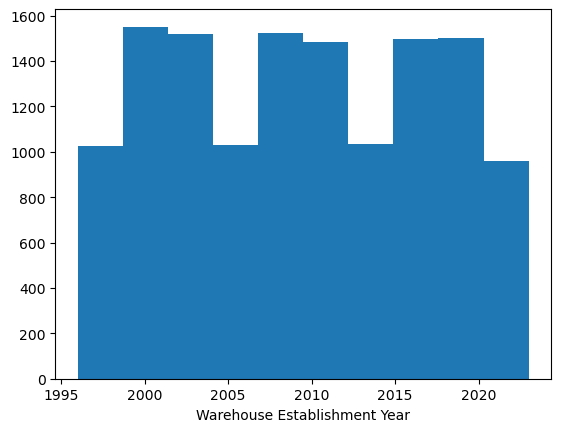

In [10]:
# Distribution of data in variable wh_est_year

plt.hist(df['wh_est_year'],bins=10)
plt.xlabel('Warehouse Establishment Year')

Text(0, 0.5, 'Product Weight')

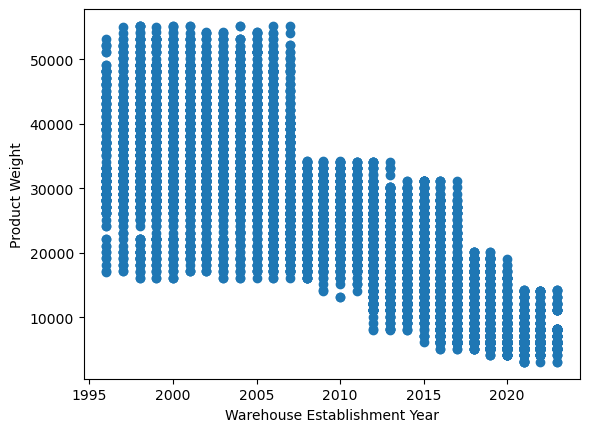

In [11]:
# Relation between Warehouse Establishment Year and the target variable.

plt.scatter(df['wh_est_year'],df['product_wg_ton'])
plt.xlabel('Warehouse Establishment Year')
plt.ylabel('Product Weight')

* The distribution for this field is random and also there is no significant relationship between this field and target
  variable
* The number is missing value is also quite big almost 50%.

* So we drop this field.

In [12]:
# Droping the field from the dataset

df.drop(columns=['wh_est_year'],inplace=True)

### 3. approved_wh_govt_certificate(Approved Govt Certificate)

<Axes: xlabel='approved_wh_govt_certificate', ylabel='count'>

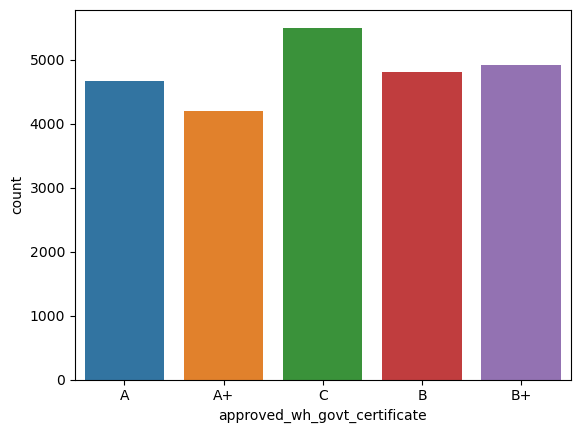

In [13]:
# Distribution of data in approved_wh_govt_certificate

sns.countplot(x=df['approved_wh_govt_certificate'])

In [14]:
#Comparision of mean and median of target variable with different values of approved_wh_govt_certificate

Govt_grp=df.groupby(by='approved_wh_govt_certificate').agg(Count=('product_wg_ton','count'),
                                          Mean=('product_wg_ton','mean'),
                                           Median=('product_wg_ton','median'))

Govt_grp

,Count,Mean,Median
approved_wh_govt_certificate,,,
A,4671,24122.532220,24099.0
A+,4191,26717.947984,26088.0
B,4812,21259.281588,21129.0
B+,4917,21456.008338,21145.0
C,5501,20938.889293,20130.0


* There is very slight decline of values in target variable as the rating declines and the distribution of rating
  is almost uniform.
 
* So we drop the rows containing the null values as the result here are inconclusive to replce null value with any other value.

In [15]:
df.dropna(inplace=True)

In [16]:
# After handling missing/null values lets confirm the results and check for final dimension of dataset

df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [17]:
df.shape

(24092, 23)

In [18]:
# Removing the unneccesary features

* Ware_house_ID and WH_Manager_ID contains warehouse ID and Manager ID which are insignificant,so we remove these two columns.

In [19]:
df.drop(columns=['Ware_house_ID','WH_Manager_ID',],inplace=True)

In [20]:
df.shape

(24092, 21)

* Now the data is clean and is ready to perform EDA.

# 2. Exploratory Data Analysis

In [21]:
# Checking Numerical and Categorical Columns

df_numerical=df.select_dtypes(exclude=['object']).columns
df_numerical

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [22]:
len(df_numerical)

15

In [23]:
df_categorical=df.select_dtypes(include=['object']).columns
df_categorical

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate'],
      dtype='object')

In [24]:
len(df_categorical)

6

* There are 15 numerical columns and 6 non-numerical columns.

* Let us describe these columns in details

### Distribution of numerical features in dataset

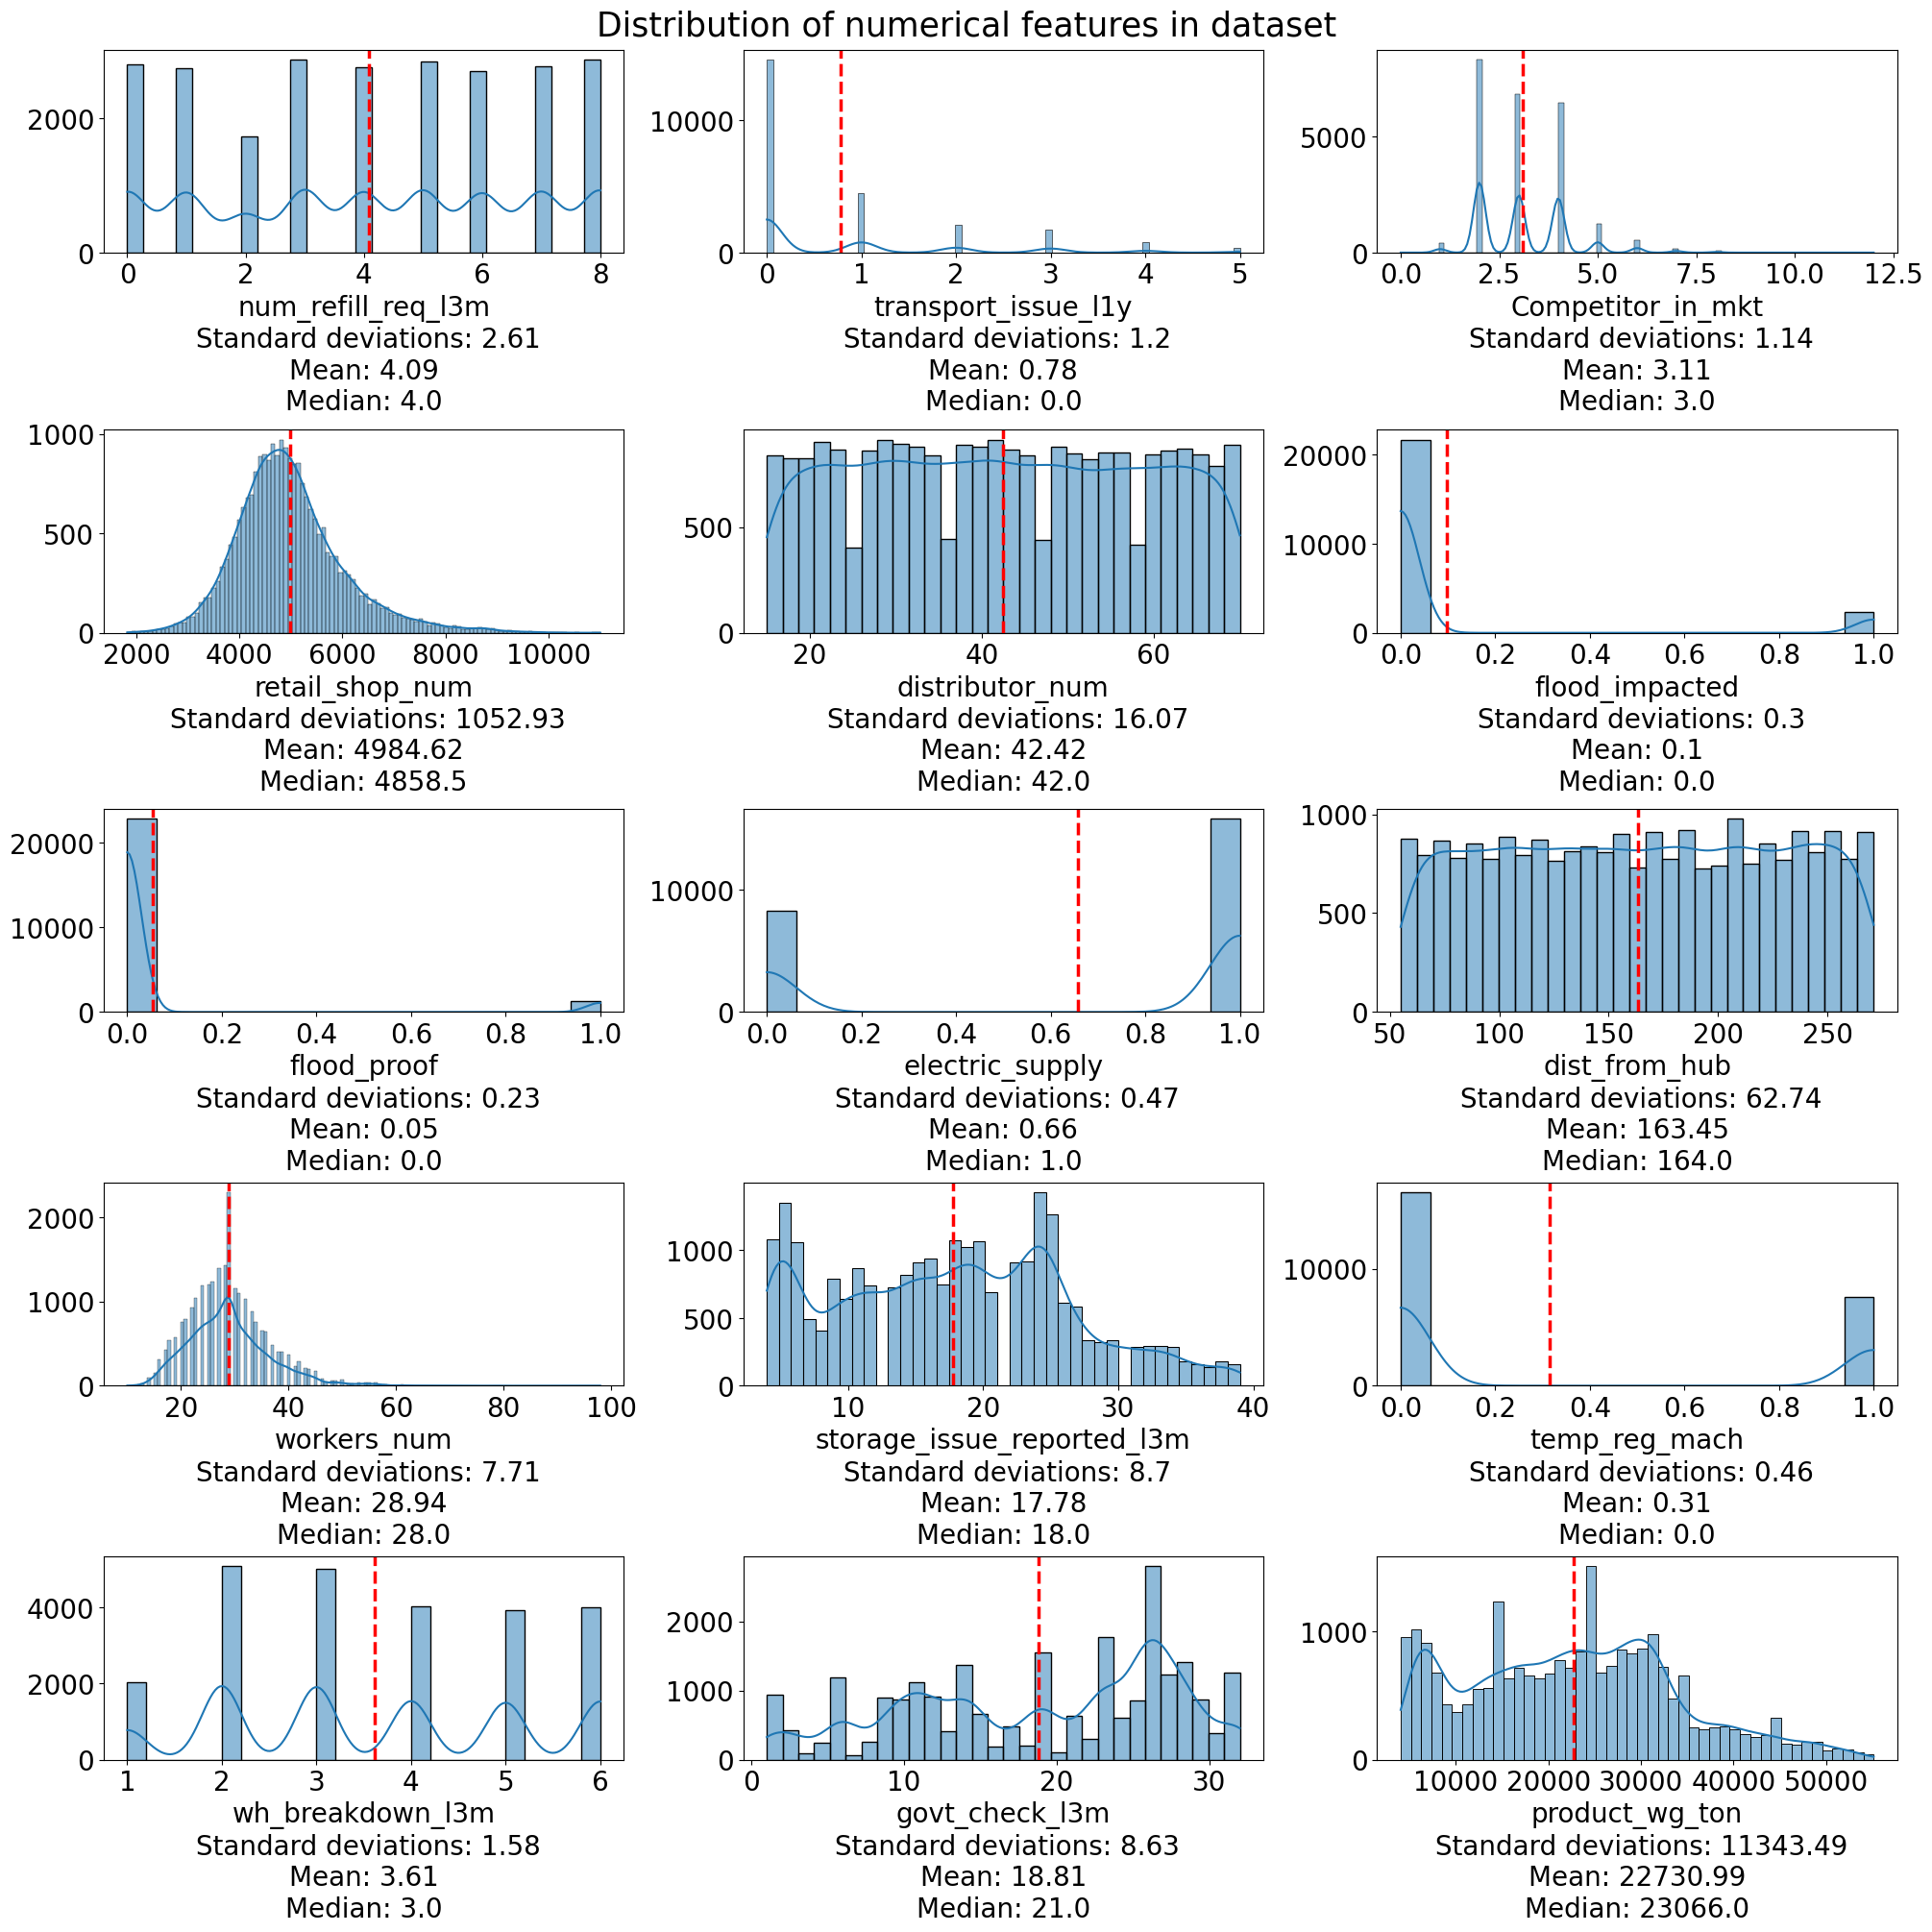

In [25]:
fig,ax=plt.subplots(5,3,constrained_layout=True)
fig.set_size_inches(20,20)
ax_list=[]
for m in range(5):
    for n in range(3):
        ax_list.append(ax[m,n])
    
for i in range(len(df_numerical)):
    col=df_numerical[i]
    sns.histplot(round(df[col],2),ax=ax_list[i],kde=True)
    ax_list[i].set_xlabel(col + '\n Standard deviations: ' + str(round(df[col].std(),2)) + '\nMean: ' + str(round(df[col].mean(),2)) +
                          '\nMedian: ' + str(round(df[col].median(),2)), size =20)
                                                                                                
    ax_list[i].set_ylabel('')
    ax_list[i].tick_params(axis='y',labelsize=20)
    ax_list[i].tick_params(axis='x',labelsize=20)
    ax_list[i].axvline(df[col].mean(),c='red',ls='--',lw=2.5)


fig.suptitle('Distribution of numerical features in dataset',size=25)
plt.show()

* Out of these 15 numerical columns, the following are discreet
1. num_refill_req_l3m
2. transport_issue_l1y
3. Competitor_in_mkt
4. flood_impacted
5. flood_proof
6. electric_supply
7. temp_reg_mach
8. wh_breakdown_l3m


### Correlation Between Target and Numerical Variable

In [26]:
for i in range(len(df_numerical)):
    col=df_numerical[i]
    corr=df['product_wg_ton'].corr(df[col])
    print(f"Correlation between Target Variable and {col} is: '\033[1m'{round(corr,4)}'\033[0m'")

Correlation between Target Variable and num_refill_req_l3m is: ''-0.0042''
Correlation between Target Variable and transport_issue_l1y is: ''-0.1888''
Correlation between Target Variable and Competitor_in_mkt is: ''0.0041''
Correlation between Target Variable and retail_shop_num is: ''-0.0054''
Correlation between Target Variable and distributor_num is: ''0.0058''
Correlation between Target Variable and flood_impacted is: ''-0.0038''
Correlation between Target Variable and flood_proof is: ''0.0011''
Correlation between Target Variable and electric_supply is: ''-0.0018''
Correlation between Target Variable and dist_from_hub is: ''-0.0034''
Correlation between Target Variable and workers_num is: ''-0.0081''
Correlation between Target Variable and storage_issue_reported_l3m is: ''0.9907''
Correlation between Target Variable and temp_reg_mach is: ''0.0708''
Correlation between Target Variable and wh_breakdown_l3m is: ''0.2629''
Correlation between Target Variable and govt_check_l3m is: ''-

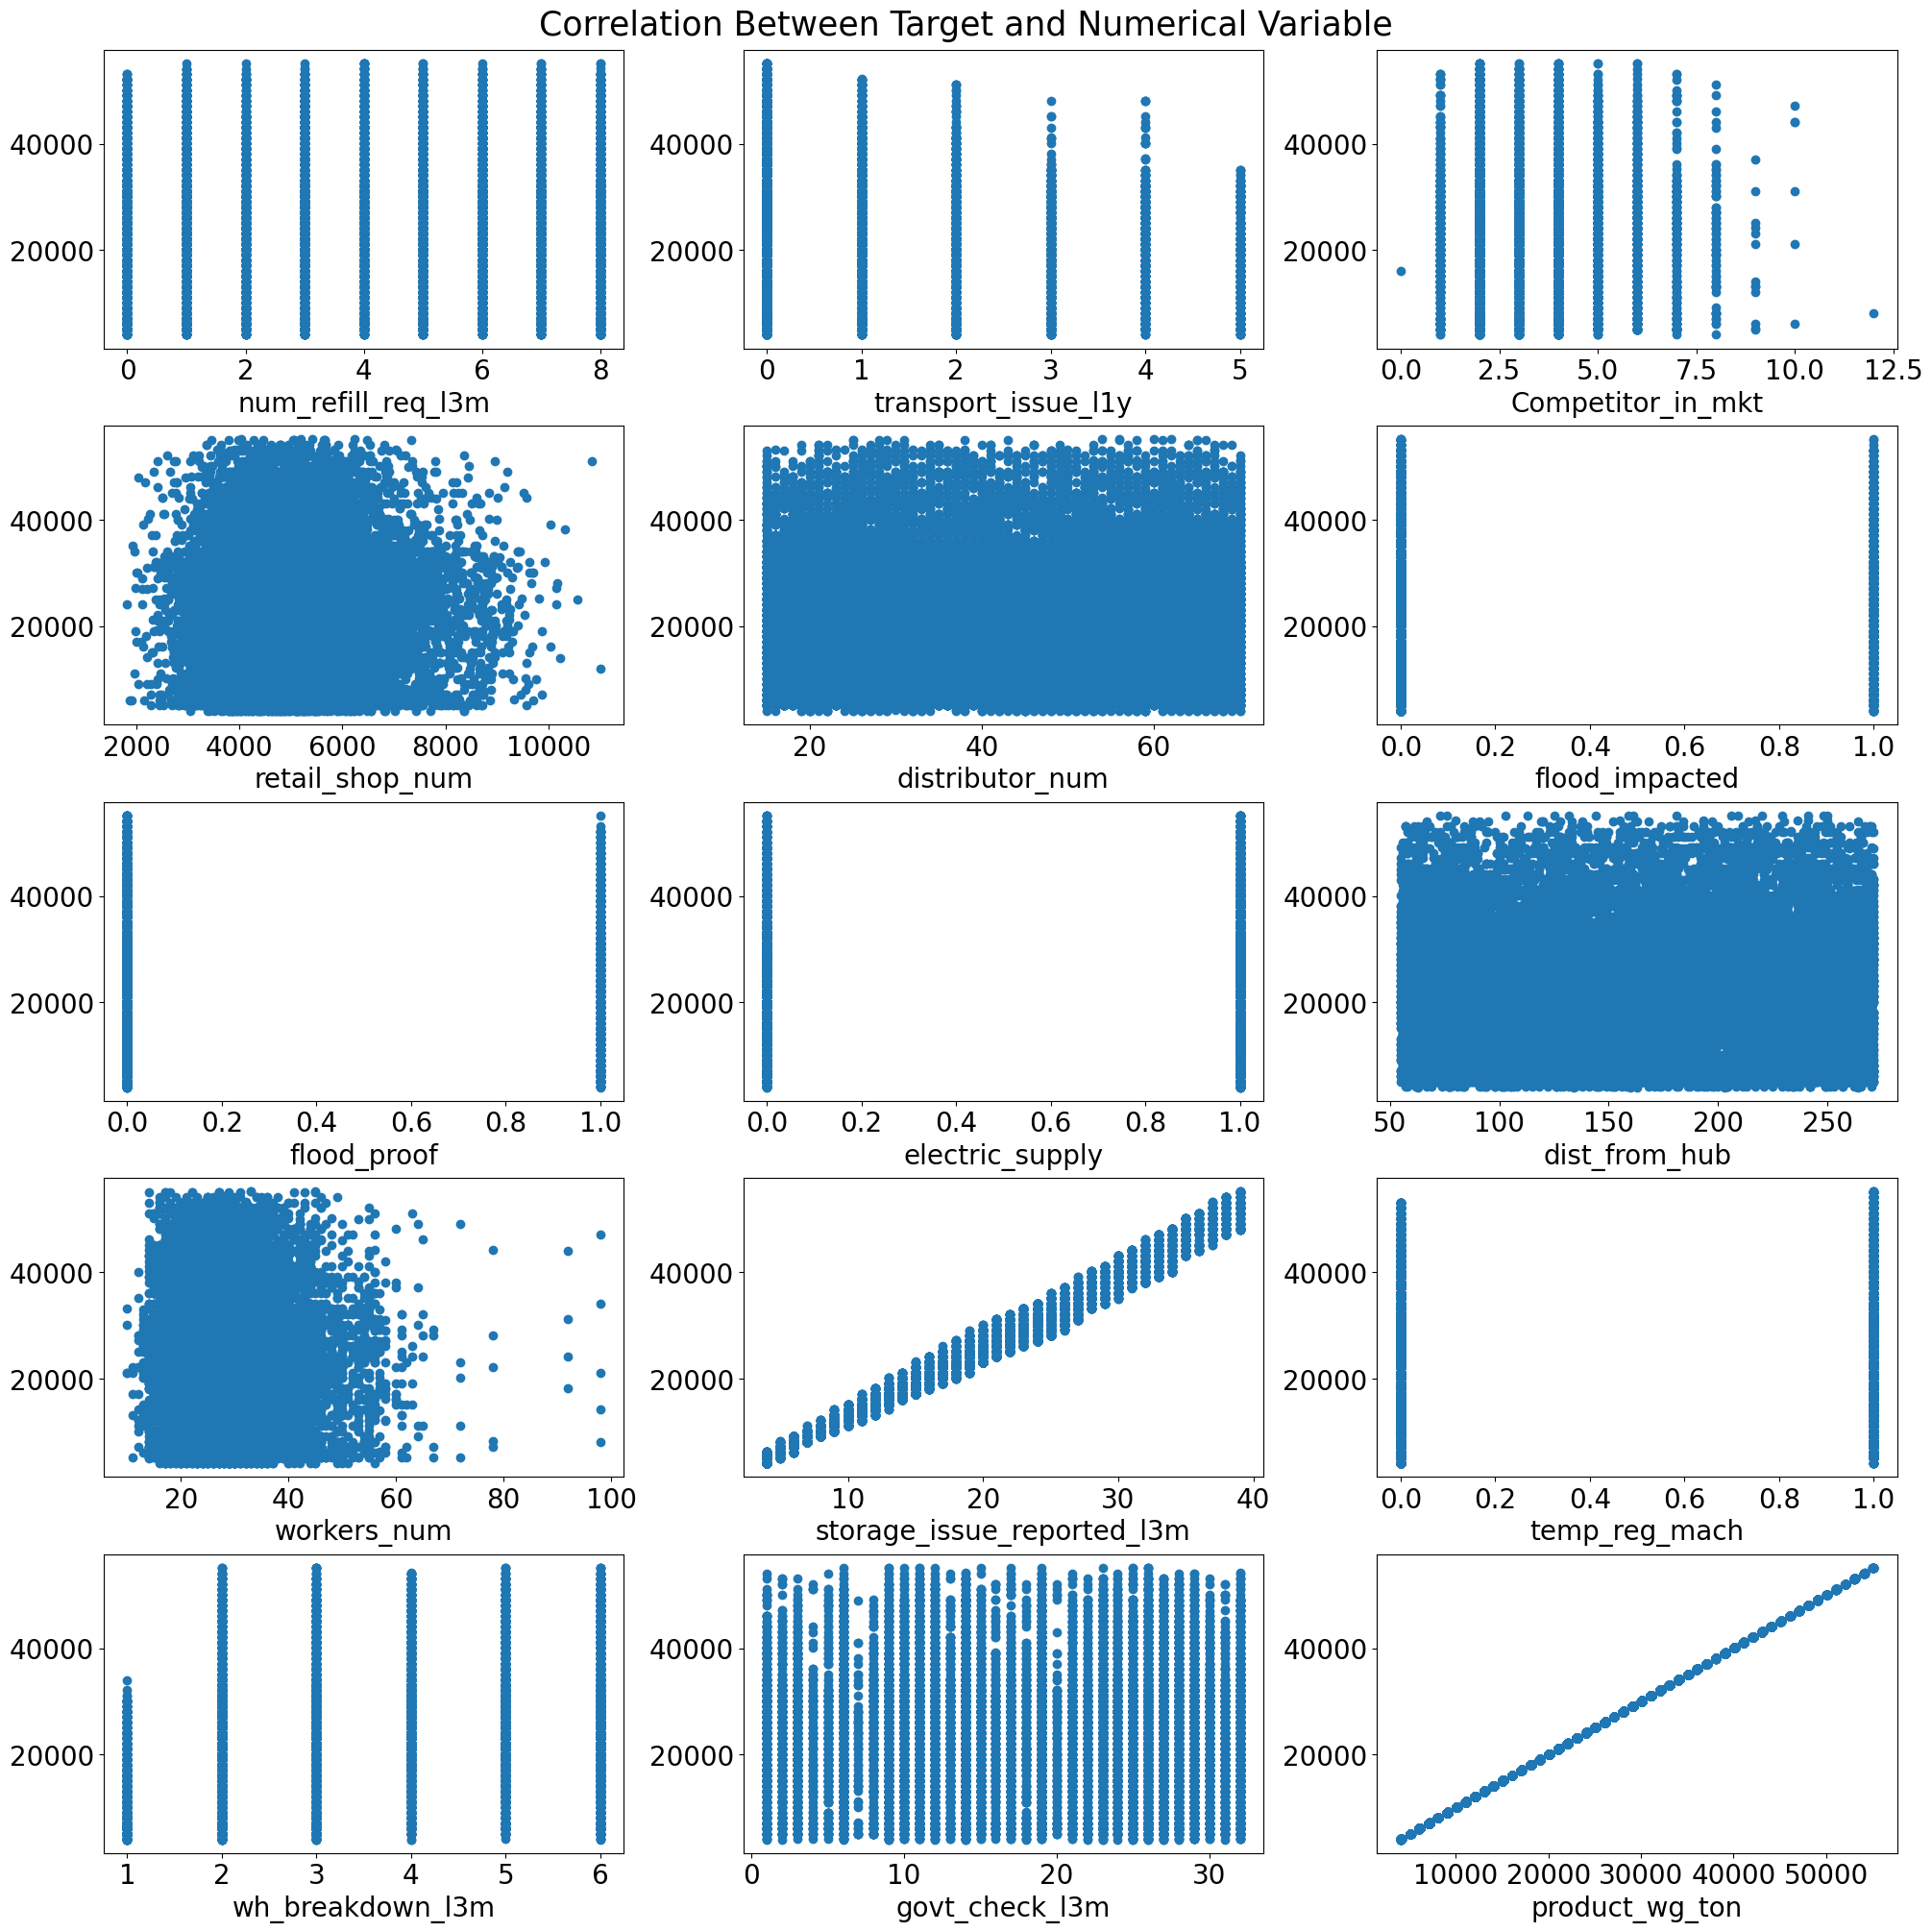

In [27]:
# Visual representation for the Correlation Between Target and Numerical Variable 

fig,ax=plt.subplots(5,3,constrained_layout=True)
fig.set_size_inches(20,20)
ax_list=[]
for m in range(5):
    for n in range(3):
        ax_list.append(ax[m,n])
    
for i in range(len(df_numerical)):
    col=df_numerical[i]
    ax_list[i].scatter(x=df[col],y=df["product_wg_ton"])
    ax_list[i].set_xlabel(col,size =20)
                                                                                                
    ax_list[i].set_ylabel('')
    ax_list[i].tick_params(axis='y',labelsize=20)
    ax_list[i].tick_params(axis='x',labelsize=20)



fig.suptitle('Correlation Between Target and Numerical Variable',size=25)
plt.show()

* storage_issue_reported_l3m has a high positive correlation with the targer variable.
* No other feature shows significant correlation with the target variable.

Text(0.5, 0.98, 'Correlation Matrix')

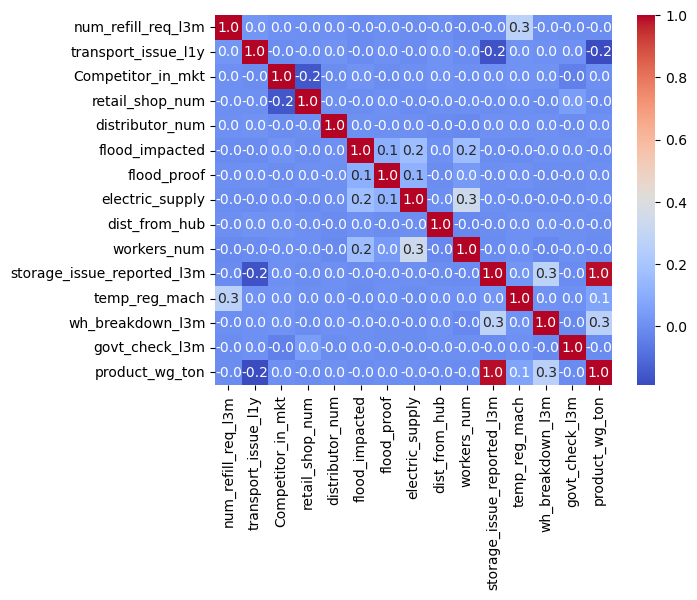

In [28]:
# Checking Multicollinearity and Correlation among the numerical features using correlation matrix


fig.set_size_inches(30,30)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='0.01f')

fig.suptitle('Correlation Matrix',size=25)

* No multicollinearity present in this dataset

### Describing Discreet features w.r.t Target Variable

##### 1. num_refill_req_l3m v/s product_wg_ton

In [29]:
grp=df.groupby(by='num_refill_req_l3m').agg(Count=('product_wg_ton','count'),
                                          Mean=('product_wg_ton','mean'),
                                           Median=('product_wg_ton','median'))

In [30]:
df_grp=pd.DataFrame(grp)

In [31]:
df_grp['No of Refill'] = df_grp.index

In [32]:
df_grp=df_grp[['No of Refill','Count','Mean','Median']]
df_grp.reset_index(drop=True,inplace=True)
df_grp

,No of Refill,Count,Mean,Median
0,0,2805,22665.515152,23073.0
1,1,2744,22820.286079,23071.0
2,2,1734,22285.973472,22120.5
3,3,2875,23241.754783,23113.0
4,4,2752,22761.333939,23082.5
5,5,2839,22703.026418,22121.0
6,6,2699,22662.701000,23088.0
7,7,2775,22845.593874,23076.0
8,8,2869,22418.668526,22128.0


<Axes: xlabel='No of Refill'>

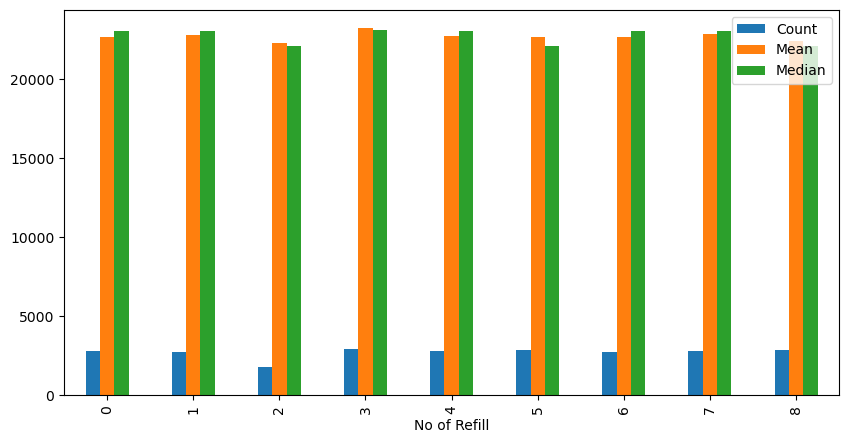

In [33]:
df_grp.plot(x="No of Refill",y=["Count","Mean","Median"],kind="bar",figsize=(10,5)) 

* There is no significant change in Quantity Supplied(product_wg_ton) as no of refill changes.
* The mean and median of product_wg_ton is almost same for each no of refills.

##### 2. transport_issue_l1y v/s product_wg_ton

In [34]:
grp1=df.groupby(by='transport_issue_l1y').agg(Count=('product_wg_ton','count'),
                                          Mean=('product_wg_ton','mean'),
                                           Median=('product_wg_ton','median'))

In [35]:
df_grp1=pd.DataFrame(grp1)

In [36]:
df_grp1['Transport Issue'] = df_grp1.index

In [37]:
df_grp1=df_grp1[['Transport Issue','Count','Mean','Median']]
df_grp1.reset_index(drop=True,inplace=True)
df_grp1

,Transport Issue,Count,Mean,Median
0,0,14605,24339.305786,24133.0
1,1,4494,21900.760125,21107.0
2,2,2127,19357.381758,19070.0
3,3,1770,18065.950847,18098.5
4,4,760,19523.313158,20092.0
5,5,336,17112.425595,17087.5


<Axes: xlabel='Transport Issue'>

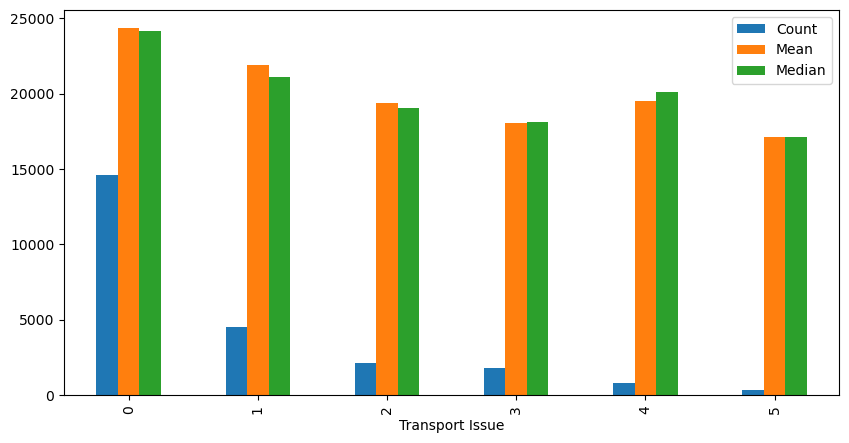

In [38]:
df_grp1.plot(x="Transport Issue",y=["Count","Mean","Median"],kind="bar",figsize=(10,5)) 

* Most of the instances have no trasport issue and the mean and median of Quantity Supplied in these instances are higher.
* Initially for transport issue 1 to 3 as the issue increase Quantity Supplied decrease slightly.
* After 3 there is no underlying pattern.

##### 3. Competitor_in_mkt v/s product_wg_ton

In [39]:
grp2=df.groupby(by='Competitor_in_mkt').agg(Count=('product_wg_ton','count'),
                                          Mean=('product_wg_ton','mean'),
                                           Median=('product_wg_ton','median'))

In [40]:
df_grp2=pd.DataFrame(grp2)

In [41]:
df_grp2['Competitor'] = df_grp2.index

In [42]:
df_grp2=df_grp2[['Competitor','Count','Mean','Median']]
df_grp2.reset_index(drop=True,inplace=True)
df_grp2

,Competitor,Count,Mean,Median
0,0,1,16056.000000,16056.0
1,1,412,22868.157767,22128.5
2,2,8331,22576.218341,22148.0
3,3,6834,22969.298068,23082.5
4,4,6475,22621.851274,23065.0
5,5,1228,22840.174267,23080.5
6,6,536,23130.087687,23126.0
7,7,181,22494.646409,23087.0
8,8,74,23198.500000,23096.5
9,9,13,17738.384615,14103.0


<Axes: xlabel='Competitor'>

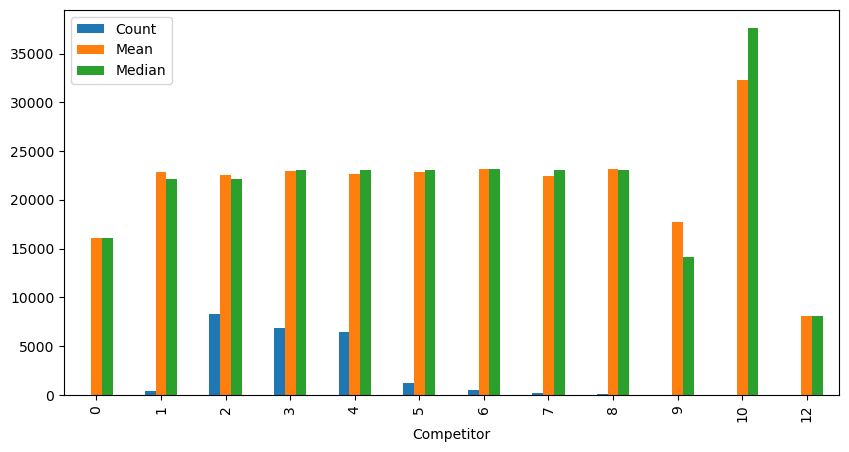

In [43]:
df_grp2.plot(x="Competitor",y=["Count","Mean","Median"],kind="bar",figsize=(10,5)) 

* Most of the markets have 2 to 4 number of competitors.
* Almost uniform quantity is supplied where no og competitors are between 1 t0 8.
* for the market having number of competitors is  10 has the highest quantity supplied.
* Where the cometitors are highest least quantity is supplied.

##### 4. flood_impacted v/s product_wg_ton

In [44]:
grp3=df.groupby(by='flood_impacted').agg(Count=('product_wg_ton','count'),
                                          Mean=('product_wg_ton','mean'),
                                           Median=('product_wg_ton','median'))

In [45]:
df_grp3=pd.DataFrame(grp3)

In [46]:
df_grp3['Flood_impacted'] = df_grp3.index

In [47]:
df_grp3=df_grp3[['Flood_impacted','Count','Mean','Median']]
df_grp3.reset_index(drop=True,inplace=True)
df_grp3

,Flood_impacted,Count,Mean,Median
0,0,21724,22745.186890,23069.5
1,1,2368,22600.723818,22142.0


<Axes: xlabel='Flood_impacted'>

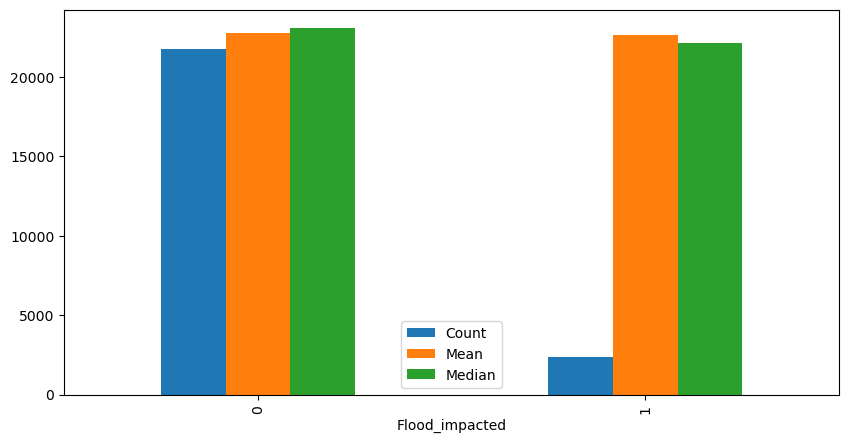

In [48]:
df_grp3.plot(x="Flood_impacted",y=["Count","Mean","Median"],kind="bar",figsize=(10,5)) 

* Most of the places are not flood impacted.
* Quantity supplied in flood impacted area and not impacted area are almost equal.

##### 5. flood_proof v/s product_wg_ton

In [49]:
grp4=df.groupby(by='flood_proof').agg(Count=('product_wg_ton','count'),
                                          Mean=('product_wg_ton','mean'),
                                           Median=('product_wg_ton','median'))

In [50]:
df_grp4=pd.DataFrame(grp4)

In [51]:
df_grp4['Flood_proof'] = df_grp4.index

In [52]:
df_grp4=df_grp4[['Flood_proof','Count','Mean','Median']]
df_grp4.reset_index(drop=True,inplace=True)
df_grp4

,Flood_proof,Count,Mean,Median
0,0,22781,22728.003951,23067.0
1,1,1311,22782.834477,23060.0


<Axes: xlabel='Flood_proof'>

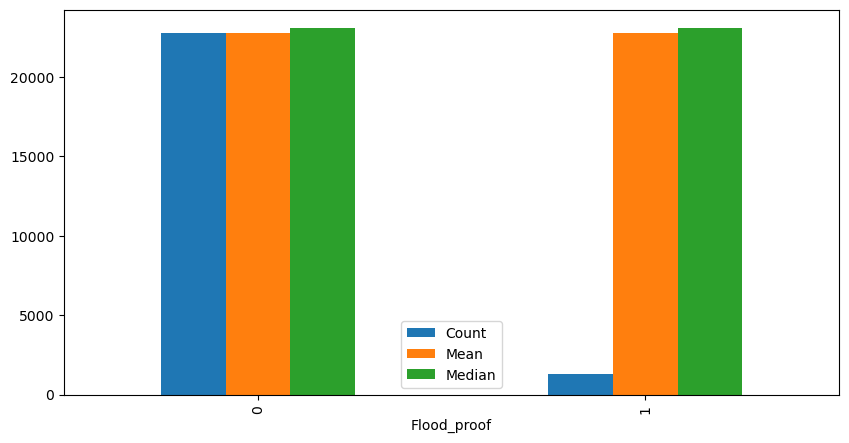

In [53]:
df_grp4.plot(x="Flood_proof",y=["Count","Mean","Median"],kind="bar",figsize=(10,5)) 

##### 6. electric_supply v/s product_wg_ton

In [54]:
grp5=df.groupby(by='electric_supply').agg(Count=('product_wg_ton','count'),
                                          Mean=('product_wg_ton','mean'),
                                           Median=('product_wg_ton','median'))

In [55]:
df_grp5=pd.DataFrame(grp5)

In [56]:
df_grp5['Electric_supply'] = df_grp5.index

In [57]:
df_grp5=df_grp5[['Electric_supply','Count','Mean','Median']]
df_grp5.reset_index(drop=True,inplace=True)
df_grp5

,Electric_supply,Count,Mean,Median
0,0,8268,22759.550798,23055.0
1,1,15824,22716.063448,23072.0


<Axes: xlabel='Electric_supply'>

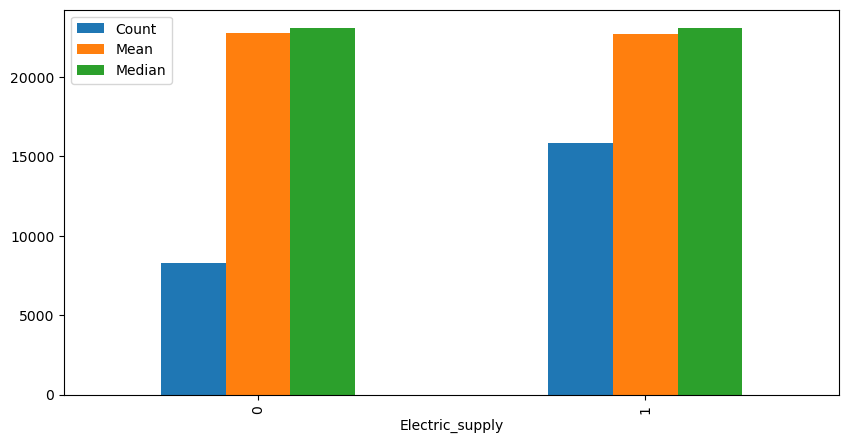

In [58]:
df_grp5.plot(x="Electric_supply",y=["Count","Mean","Median"],kind="bar",figsize=(10,5))

##### 7. temp_reg_mach v/s product_wg_ton

In [59]:
grp6=df.groupby(by='temp_reg_mach').agg(Count=('product_wg_ton','count'),
                                          Mean=('product_wg_ton','mean'),
                                           Median=('product_wg_ton','median'))

In [60]:
df_grp6=pd.DataFrame(grp6)

In [61]:
df_grp6['Temprature_Regulation'] = df_grp6.index

In [62]:
df_grp6=df_grp6[['Temprature_Regulation','Count','Mean','Median']]
df_grp6.reset_index(drop=True,inplace=True)
df_grp6

,Temprature_Regulation,Count,Mean,Median
0,0,16522,22187.045818,22116.0
1,1,7570,23918.174769,24061.0


<Axes: xlabel='Temprature_Regulation'>

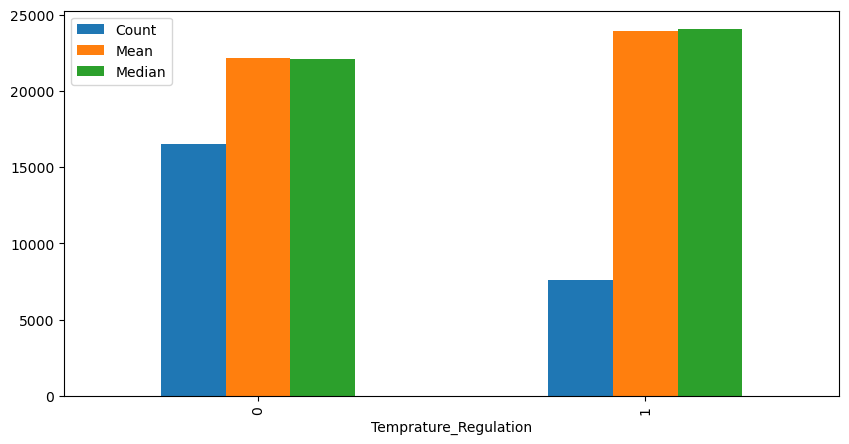

In [63]:
df_grp6.plot(x="Temprature_Regulation",y=["Count","Mean","Median"],kind="bar",figsize=(10,5)) 

* Electric Supply and Temperature Regulation has no impact on Quantity Supplied.

##### 8. wh_breakdown_l3m v/s product_wg_ton

In [64]:
grp7=df.groupby(by='wh_breakdown_l3m').agg(Count=('product_wg_ton','count'),
                                          Mean=('product_wg_ton','mean'),
                                           Median=('product_wg_ton','median'))

In [65]:
df_grp7=pd.DataFrame(grp7)

In [66]:
df_grp7['WareHouse_Breakdown'] = df_grp7.index

In [67]:
df_grp7=df_grp7[['WareHouse_Breakdown','Count','Mean','Median']]
df_grp7.reset_index(drop=True,inplace=True)
df_grp7

,WareHouse_Breakdown,Count,Mean,Median
0,1,2036,11627.104617,9123.0
1,2,5076,21546.685579,21136.0
2,3,5006,22118.182181,22120.0
3,4,4037,25591.004459,25112.0
4,5,3925,25229.078981,25085.0
5,6,4012,25307.216600,25087.5


<Axes: xlabel='WareHouse_Breakdown'>

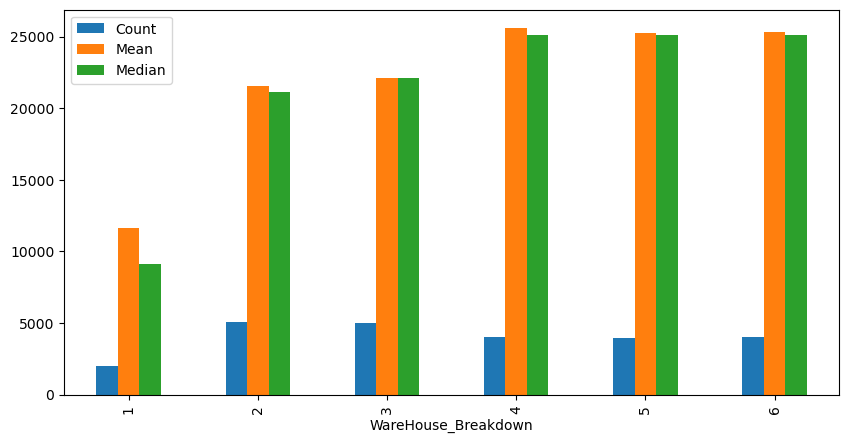

In [68]:
df_grp7.plot(x="WareHouse_Breakdown",y=["Count","Mean","Median"],kind="bar",figsize=(10,5)) 

### Describing Non-Numeric Features

In [69]:
df_categorical

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate'],
      dtype='object')

In [70]:
# Checking Unique Values in Categorical Fields.

for i in df_categorical:
    print(f'Unique Values in {i} is {df[i].unique()}')

Unique Values in Location_type is ['Urban' 'Rural']
Unique Values in WH_capacity_size is ['Small' 'Large' 'Mid']
Unique Values in zone is ['West' 'North' 'South' 'East']
Unique Values in WH_regional_zone is ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Unique Values in wh_owner_type is ['Rented' 'Company Owned']
Unique Values in approved_wh_govt_certificate is ['A' 'A+' 'C' 'B' 'B+']


### Distribution of Categorical features in dataset

In [71]:
cat_feature=df[df.select_dtypes(include=['object']).columns.tolist()]

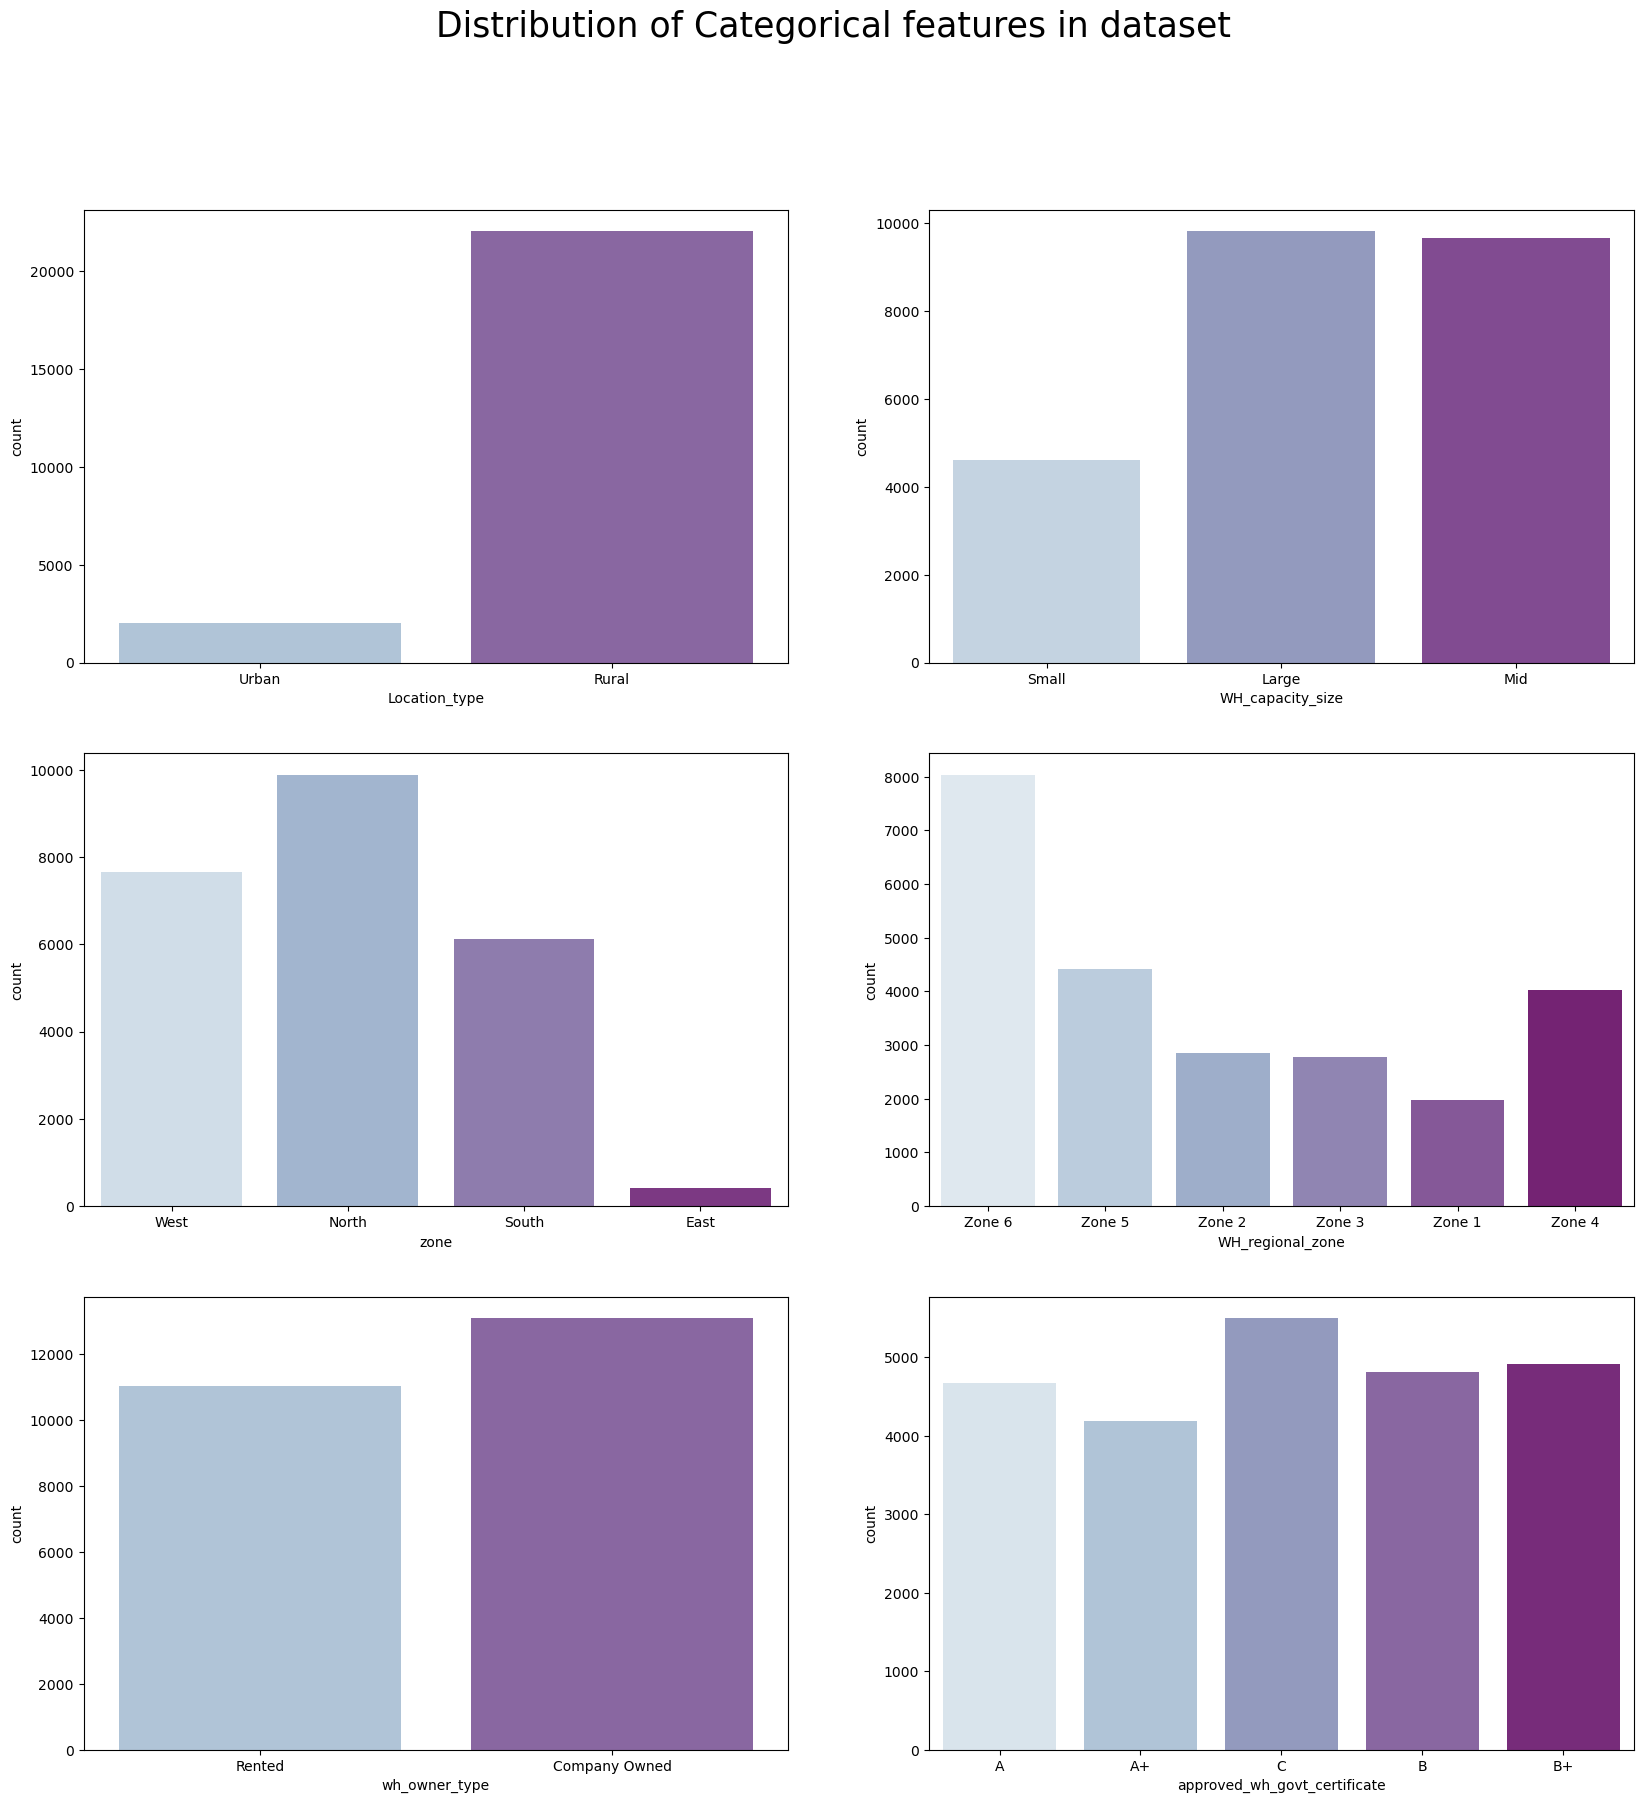

In [72]:
fig , ax = plt.subplots(3,2,figsize = (20,20))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (cat_feature, ax.flatten()):
    sns.countplot(x=cat_feature[i],ax = subplots, palette = 'BuPu')
fig.suptitle('Distribution of Categorical features in dataset',size=25)       
plt.show()

##### 1. Location_type v/s product_wg_ton

In [73]:
l1=df['product_wg_ton'][df['Location_type']=='Urban'].describe()
l2=df['product_wg_ton'][df['Location_type']=='Rural'].describe()

In [74]:
rep1=pd.DataFrame(l1)

In [75]:
rep2=pd.DataFrame(l2)

In [76]:
rep1.rename(columns={'product_wg_ton':'Urban'},inplace=True)

In [77]:
rep2.rename(columns={'product_wg_ton':'Rural'},inplace=True)

In [78]:
df_Loc=pd.concat([rep1,rep2],axis=1)

In [79]:
print("'\033[1m'REPORT 1: Location_type v/s product_wg_ton '\033[0m'")
df_Loc

''REPORT 1: Location_type v/s product_wg_ton ''


,Urban,Rural
count,2043.000000,22049.000000
mean,25004.033774,22520.373396
std,10613.194555,11386.069490
min,4059.000000,4055.000000
25%,17131.000000,13132.000000
50%,25074.000000,22139.000000
75%,31143.500000,30114.000000
max,55078.000000,55151.000000


* 91.5% Location are Rural 
* Mean of quantity in Urban area is ~11% more then Rural 

##### 2. WH_capacity_size v/s product_wg_ton

In [80]:
c1=df['product_wg_ton'][df['WH_capacity_size']=='Small'].describe()

In [81]:
c2=df['product_wg_ton'][df['WH_capacity_size']=='Mid'].describe()

In [82]:
c3=df['product_wg_ton'][df['WH_capacity_size']=='Large'].describe()

In [83]:
cap1=pd.DataFrame(c1)

In [84]:
cap2=pd.DataFrame(c2)

In [85]:
cap3=pd.DataFrame(c3)

In [86]:
cap1.rename(columns={'product_wg_ton':'Small'},inplace=True)

In [87]:
cap2.rename(columns={'product_wg_ton':'Mid'},inplace=True)

In [88]:
cap3.rename(columns={'product_wg_ton':'Large'},inplace=True)

In [89]:
df_cap=pd.concat([cap1,cap2,cap3],axis=1)

In [90]:
print("'\033[1m'REPORT 2: WH_capacity_size v/s product_wg_ton '\033[0m'")
df_cap

''REPORT 2: WH_capacity_size v/s product_wg_ton ''


,Small,Mid,Large
count,4615.000000,9657.000000,9820.000000
mean,22594.779415,22841.373615,22686.446232
std,11246.315294,11373.982646,11359.075851
min,4056.000000,4055.000000,4057.000000
25%,14078.000000,14069.000000,14064.750000
50%,22138.000000,23083.000000,23055.000000
75%,30125.000000,30135.000000,30124.000000
max,55095.000000,55151.000000,55144.000000


* 41% of warehouses are Large,40% are Mid sized and the rest(19%) are small.
* Quantity supplied in all three category are statistically same.

##### 3. zone v/s product_wg_ton

In [91]:
r1=df['product_wg_ton'][df['zone']=='East'].describe()

In [92]:
r2=df['product_wg_ton'][df['zone']=='West'].describe()

In [93]:
r3=df['product_wg_ton'][df['zone']=='North'].describe()

In [94]:
r4=df['product_wg_ton'][df['zone']=='South'].describe()

In [95]:
report=pd.DataFrame(r1)

In [96]:
report2=pd.DataFrame(r2)

In [97]:
report3=pd.DataFrame(r3)

In [98]:
report4=pd.DataFrame(r4)

In [99]:
report.rename(columns={'product_wg_ton':'East'},inplace=True)

In [100]:
report2.rename(columns={'product_wg_ton':'West'},inplace=True)

In [101]:
report3.rename(columns={'product_wg_ton':'North'},inplace=True)

In [102]:
report4.rename(columns={'product_wg_ton':'South'},inplace=True)

In [103]:
df_zone=pd.concat([report,report2,report3,report4],axis=1)

In [104]:
print("'\033[1m'REPORT 3: Zone v/s product_wg_ton '\033[0m'")
df_zone

''REPORT 3: Zone v/s product_wg_ton ''


,East,West,North,South
count,421.000000,7665.000000,9889.000000,6117.000000
mean,23053.990499,22654.719635,22859.048235,22597.297695
std,11161.553604,11376.506047,11260.557201,11447.751421
min,4091.000000,4056.000000,4055.000000,4057.000000
25%,14103.000000,14056.000000,14089.000000,13144.000000
50%,24060.000000,23068.000000,23076.000000,22142.000000
75%,31110.000000,30123.000000,30136.000000,30119.000000
max,52095.000000,55150.000000,55144.000000,55151.000000


* East Zone has least number of warehouses only 1.7%
* West Zone has 32% of warehouses 
* 41% warehouses are in North Zone which is highest
* 25.3 % warehouses are in South Zone.
* Quantity Supplied in all these zones have no significant difference.

##### 4. WH_regional_zone v/s product_wg_ton

In [105]:
rz1=df['product_wg_ton'][df['WH_regional_zone']=='Zone 1'].describe()

In [106]:
rz2=df['product_wg_ton'][df['WH_regional_zone']=='Zone 2'].describe()

In [107]:
rz3=df['product_wg_ton'][df['WH_regional_zone']=='Zone 3'].describe()

In [108]:
rz4=df['product_wg_ton'][df['WH_regional_zone']=='Zone 4'].describe()

In [109]:
rz5=df['product_wg_ton'][df['WH_regional_zone']=='Zone 5'].describe()

In [110]:
rz6=df['product_wg_ton'][df['WH_regional_zone']=='Zone 6'].describe()

In [111]:
rzn1=pd.DataFrame(rz1)

In [112]:
rzn2=pd.DataFrame(rz2)

In [113]:
rzn3=pd.DataFrame(rz3)

In [114]:
rzn4=pd.DataFrame(rz4)

In [115]:
rzn5=pd.DataFrame(rz5)

In [116]:
rzn6=pd.DataFrame(rz6)

In [117]:
rzn1.rename(columns={'product_wg_ton':'Zone 1'},inplace=True)

In [118]:
rzn2.rename(columns={'product_wg_ton':'Zone 2'},inplace=True)

In [119]:
rzn3.rename(columns={'product_wg_ton':'Zone 3'},inplace=True)

In [120]:
rzn4.rename(columns={'product_wg_ton':'Zone 4'},inplace=True)

In [121]:
rzn5.rename(columns={'product_wg_ton':'Zone 5'},inplace=True)

In [122]:
rzn6.rename(columns={'product_wg_ton':'Zone 6'},inplace=True)

In [123]:
df_reg_zn=pd.concat([rzn1,rzn2,rzn3,rzn4,rzn5,rzn6],axis=1)

In [124]:
print("'\033[1m'REPORT 4: WH_regional_zone v/s product_wg_ton '\033[0m'")
df_reg_zn

''REPORT 4: WH_regional_zone v/s product_wg_ton ''


,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6
count,1970.000000,2849.000000,2782.000000,4026.000000,4425.000000,8040.000000
mean,22428.519797,23164.878554,22563.631201,22804.367611,22630.792994,22727.657463
std,11190.126905,11576.093113,11161.913771,11372.027437,11529.159303,11240.886978
min,4056.000000,4062.000000,4057.000000,4055.000000,4057.000000,4058.000000
25%,14072.250000,14088.000000,14056.500000,14069.000000,13149.000000,14079.000000
50%,22108.000000,23119.000000,23061.500000,23080.000000,22131.000000,23069.500000
75%,30101.000000,31081.000000,30085.750000,30139.000000,30115.000000,30134.000000
max,54090.000000,55057.000000,55151.000000,55150.000000,55144.000000,55095.000000


* Zone 6 has highest number of warehouses
* Quantity Supplies in each zone are statistically indifferent.

##### 5. wh_owner_type v/s product_wg_ton

In [125]:
o1=df['product_wg_ton'][df['wh_owner_type']=='Rented'].describe()

In [126]:
o2=df['product_wg_ton'][df['wh_owner_type']=='Company Owned'].describe()

In [127]:
ot1=pd.DataFrame(o1)

In [128]:
ot2=pd.DataFrame(o2)

In [129]:
ot1.rename(columns={'product_wg_ton':'Rented'},inplace=True)

In [130]:
ot2.rename(columns={'product_wg_ton':'Company Owned'},inplace=True)

In [131]:
df_OType=pd.concat([ot1,ot2],axis=1)

In [132]:
print("'\033[1m'REPORT 5: wh_owner_type v/s product_wg_ton '\033[0m'")
df_OType

''REPORT 5: wh_owner_type v/s product_wg_ton ''


,Rented,Company Owned
count,11012.000000,13080.000000
mean,22798.518616,22674.133563
std,11381.440196,11311.564474
min,4055.000000,4056.000000
25%,14073.000000,14067.000000
50%,23079.500000,22149.000000
75%,30129.250000,30128.000000
max,55111.000000,55151.000000


* Ownership type has no impact on Supply.  

##### 6. approved_wh_govt_certificate v/s product_wg_ton

In [133]:
g1=df['product_wg_ton'][df['approved_wh_govt_certificate']=='A+'].describe()

In [134]:
g2=df['product_wg_ton'][df['approved_wh_govt_certificate']=='A'].describe()

In [135]:
g3=df['product_wg_ton'][df['approved_wh_govt_certificate']=='B+'].describe()

In [136]:
g4=df['product_wg_ton'][df['approved_wh_govt_certificate']=='B'].describe()

In [137]:
g5=df['product_wg_ton'][df['approved_wh_govt_certificate']=='C'].describe()

In [138]:
gc1=pd.DataFrame(g1)

In [139]:
gc2=pd.DataFrame(g2)

In [140]:
gc3=pd.DataFrame(g3)

In [141]:
gc4=pd.DataFrame(g4)

In [142]:
gc5=pd.DataFrame(g5)

In [143]:
gc1.rename(columns={'product_wg_ton':'A+'},inplace=True)

In [144]:
gc2.rename(columns={'product_wg_ton':'A'},inplace=True)

In [145]:
gc3.rename(columns={'product_wg_ton':'B+'},inplace=True)

In [146]:
gc4.rename(columns={'product_wg_ton':'B'},inplace=True)

In [147]:
gc5.rename(columns={'product_wg_ton':'C'},inplace=True)

In [148]:
df_gov_cer=pd.concat([gc1,gc2,gc3,gc4,gc5],axis=1)

In [149]:
print("'\033[1m'REPORT 6: approved_wh_govt_certificate v/s product_wg_ton '\033[0m'")
df_gov_cer

''REPORT 6: approved_wh_govt_certificate v/s product_wg_ton ''


,A+,A,B+,B,C
count,4191.000000,4671.000000,4917.000000,4812.000000,5501.000000
mean,26717.947984,24122.532220,21456.008338,21259.281588,20938.889293
std,11547.487790,11137.290349,10425.903770,10452.610063,11986.190577
min,5056.000000,5055.000000,4055.000000,4057.000000,5055.000000
25%,18070.500000,15603.000000,13144.000000,13055.750000,9129.000000
50%,26088.000000,24099.000000,21145.000000,21129.000000,20130.000000
75%,32151.000000,31131.000000,28134.000000,28138.000000,30099.000000
max,55150.000000,55151.000000,51137.000000,51131.000000,55120.000000


* As the grade improves the quantity supplied also increases,except B+ to A  where it decreases slightly.

# Demand Analysis

Text(0, 0.5, 'Product Weight Supplied')

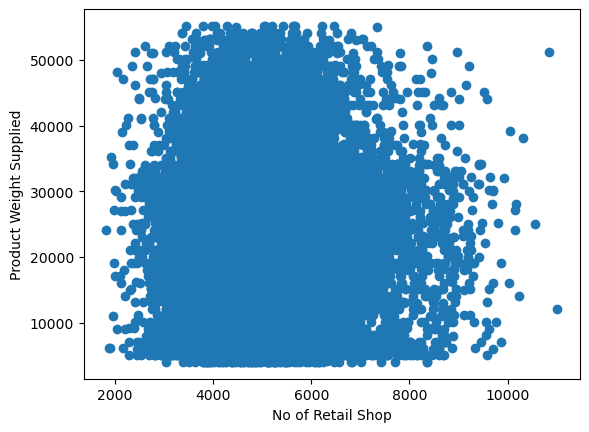

In [150]:
# Demand v/s Supply
plt.scatter(df['retail_shop_num'],df['product_wg_ton'])
plt.xlabel('No of Retail Shop')
plt.ylabel('Product Weight Supplied')

* To analyse demand the feature 'retail_shop_num' present in dataset is used.
* This feature insicates the number of retaile shop present in a specific area.
* Above graph is between 'retail_shop_num'(demand) and 'product_wg_ton'(supply).
* It shows no relation between Quantity Demanded and Quantity Supplied

#### Zone wise Demand

In [151]:
demand_zone=df.groupby(by='zone').agg(Mean=('retail_shop_num','mean'),
                            Median=('retail_shop_num','median'))

In [152]:
df_demand_zone=pd.DataFrame(demand_zone)

In [153]:
df_demand_zone['zone'] = df_demand_zone.index

In [154]:
df_demand_zone=df_demand_zone[['zone','Mean','Median']]
df_demand_zone.reset_index(drop=True,inplace=True)
df_demand_zone

,zone,Mean,Median
0,East,4802.451306,4588.0
1,North,5044.117100,4924.0
2,South,5020.835377,4900.0
3,West,4888.969472,4757.0


<Axes: xlabel='zone'>

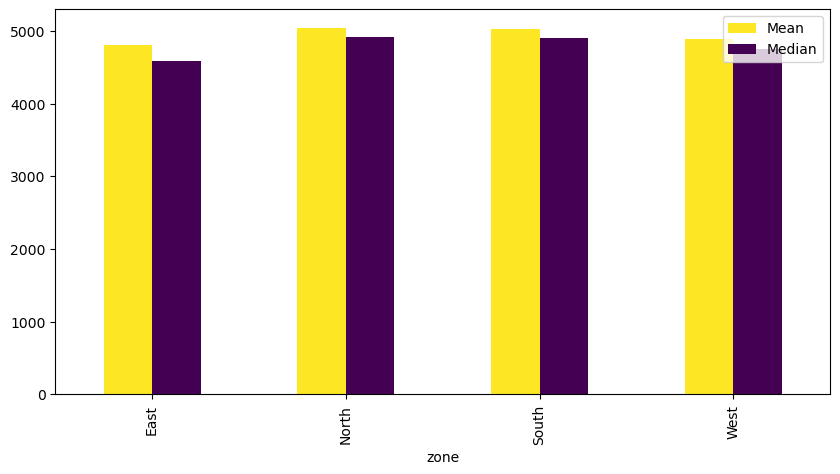

In [155]:
df_demand_zone.plot(x="zone",y=["Mean","Median"],kind="bar",figsize=(10,5),cmap = 'viridis_r') 

* Above graph show the mean and median of demand throung number of retail shop in diffrent zones.
* All the zone are having similar demand.

#### Location wise Demand

In [156]:
demand_loc=df.groupby(by='Location_type').agg(Mean=('retail_shop_num','mean'),
                                           Median=('retail_shop_num','median'))


In [157]:
df_demand_loc=pd.DataFrame(demand_loc)

In [158]:
df_demand_loc['Location_type'] = df_demand_loc.index

In [159]:
df_demand_loc=df_demand_loc[['Location_type','Mean','Median']]
df_demand_loc.reset_index(drop=True,inplace=True)
df_demand_loc

,Location_type,Mean,Median
0,Rural,4984.756089,4859.0
1,Urban,4983.171806,4850.0


<Axes: xlabel='Location_type'>

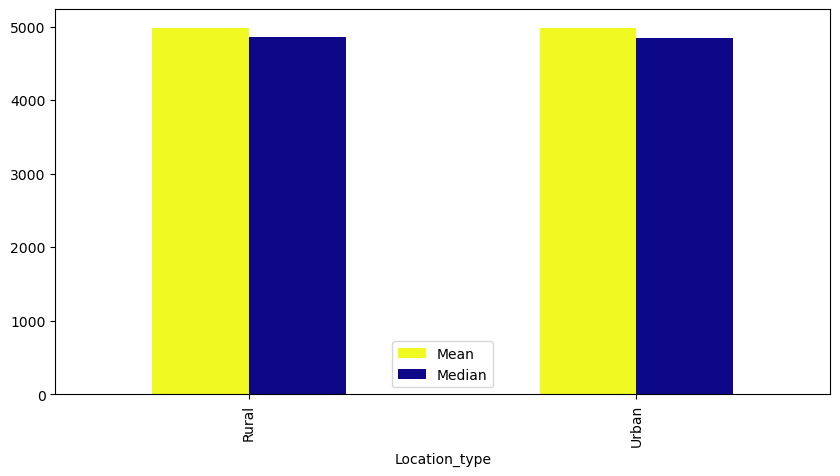

In [160]:
df_demand_loc.plot(x="Location_type",y=["Mean","Median"],kind="bar",figsize=(10,5),cmap = 'plasma_r') 

* The demand does not vary in rural and urban area.

#### Regional Zone wise Demand

In [161]:
demand_rz=df.groupby(by='WH_regional_zone').agg(Mean=('retail_shop_num','mean'),
                                           Median=('retail_shop_num','median'))

In [162]:
df_demand_rz=pd.DataFrame(demand_rz)

In [163]:
df_demand_rz['WH_regional_zone'] = df_demand_rz.index

In [164]:
df_demand_rz=df_demand_rz[['WH_regional_zone','Mean','Median']]
df_demand_rz.reset_index(drop=True,inplace=True)
df_demand_rz

,WH_regional_zone,Mean,Median
0,Zone 1,5174.941624,5035.5
1,Zone 2,5018.810811,4898.0
2,Zone 3,4827.816319,4738.5
3,Zone 4,5028.557874,4886.0
4,Zone 5,4915.127006,4795.0
5,Zone 6,4996.378607,4867.0


<Axes: xlabel='WH_regional_zone'>

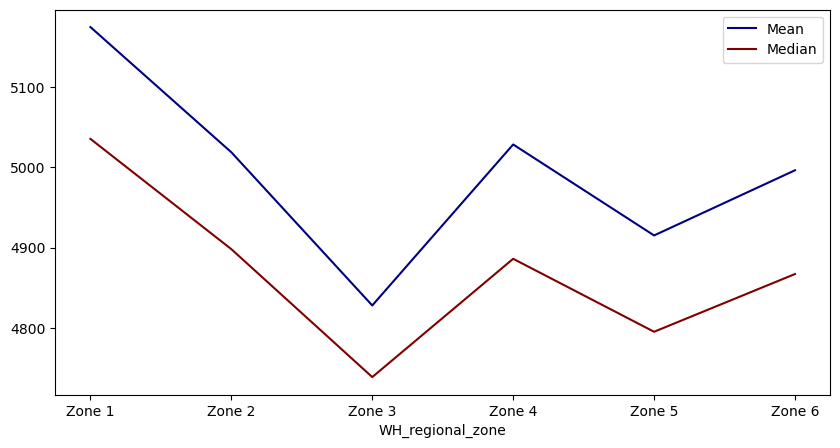

In [165]:
df_demand_rz.plot(x="WH_regional_zone",y=["Mean","Median"],kind="line",figsize=(10,5),cmap='jet') 

* Even in different regional zone the mean and median of demand is in same range.

# Preprocessing

### Encoding Non-Numeric data using Label Encoder

In [166]:
from sklearn.preprocessing import LabelEncoder

In [167]:
for col in df_categorical:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head(5)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,1,91,29.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,0,1,210,31.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,0,161,37.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,0,103,21.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,0,1,112,25.0,18,0,4,6,24,24071


### Split Dependent and Independent Variables

In [168]:
x=df.drop(columns=['product_wg_ton'])
y=df['product_wg_ton']

In [169]:
x.head(2)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29.0,13,0,0,5,15
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31.0,4,0,0,3,17


In [170]:
y.head(2)

0    17115
1     5074
Name: product_wg_ton, dtype: int64

### Splitting Training and Testing Data

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

In [173]:
X_train.shape

(19273, 20)

In [174]:
X_test.shape

(4819, 20)

### Standardization the data

In [175]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# Model Building

### 1. Linear Regression

In [176]:
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error

In [177]:
model_lr=LinearRegression()

In [178]:
model_lr.fit(X_train,y_train)
y_train_pred=model_lr.predict(X_train)
r_sq_train=r2_score(y_train,y_train_pred)
print(f'R-square value for train is {r_sq_train}')
print(f'RMSE value for train is {sqrt(mean_squared_error(y_train,y_train_pred))}')

R-square value for train is 0.9850503797167351
RMSE value for train is 1389.7764237690437


In [179]:
y_test_pred=model_lr.predict(X_test)
r_sq_test=r2_score(y_test,y_test_pred)
print(f'R-square value for test is {r_sq_test}')
print(f'RMSE value for test is {sqrt(mean_squared_error(y_test,y_test_pred))}')

R-square value for test is 0.9847001068656778
RMSE value for test is 1391.4024795735693


In [180]:
n=len(y_train)
k=X_train.shape[1]

adj_r2 = 1-((1-r2_score(y_train,y_train_pred))*(n-1)/(n-k-1))
print(f'Adj R-square value for train is {adj_r2}')

Adj R-square value for train is 0.9850348492572678


In [181]:
n=len(y_test)
k=X_test.shape[1]

adj_r2 = 1-((1-r2_score(y_test,y_test_pred))*(n-1)/(n-k-1))
print(f'Adj R-square value for test is {adj_r2}')

Adj R-square value for test is 0.9846363307375647


### 2.Decision Tree Regressor

In [182]:
from sklearn.tree import DecisionTreeRegressor

In [183]:
# Decisiontree Regressor

model_dt=DecisionTreeRegressor(max_depth=5,min_samples_split=11)
model_dt.fit(X_train,y_train)

y_dt_train_pred=model_dt.predict(X_train)
r_sq_dt_train=r2_score(y_train,y_dt_train_pred)
print(f'R-square value for train is {r_sq_dt_train}')
print(f'RMSE value for train is {sqrt(mean_squared_error(y_train,y_dt_train_pred))}')

R-square value for train is 0.9853949786705558
RMSE value for train is 1373.6653922294988


In [184]:
y_dt_test_pred=model_dt.predict(X_test)
r_sq_dt_test=r2_score(y_test,y_dt_test_pred)
print(f'R-square value for test is {r_sq_dt_test}')
print(f'RMSE value for test is {sqrt(mean_squared_error(y_test,y_dt_test_pred))}')

R-square value for test is 0.9848737363578325
RMSE value for test is 1383.4848479850318


In [185]:
n=len(y_train)
k=X_train.shape[1]

adj_r2 = 1-((1-r2_score(y_train,y_dt_train_pred))*(n-1)/(n-k-1))
print(f'Adj R-square value for train is {adj_r2}')

Adj R-square value for train is 0.9853798061987821


In [186]:
n=len(y_test)
k=X_test.shape[1]

adj_r2 = 1-((1-r2_score(y_test,y_dt_test_pred))*(n-1)/(n-k-1))
print(f'Adj R-square value for test is {adj_r2}')

Adj R-square value for test is 0.9848106839875025


### 3. Random Forest Regressor

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
# Randomforest Regressor

model_rf=RandomForestRegressor(max_depth=10,max_leaf_nodes=15,n_estimators=15)
model_rf.fit(X_train,y_train)

y_rf_train_pred=model_rf.predict(X_train)
r_sq_rf_train=r2_score(y_train,y_rf_train_pred)
print(f'R-square value for train is {r_sq_rf_train}')
print(f'RMSE value for train is {sqrt(mean_squared_error(y_train,y_rf_train_pred))}')

R-square value for train is 0.9821049207734932
RMSE value for train is 1520.5358772494938


In [189]:
y_rf_test_pred=model_rf.predict(X_test)
r_sq_rf_test=r2_score(y_test,y_rf_test_pred)
print(f'R-square value for test is {r_sq_rf_test}')
print(f'RMSE value for test is {sqrt(mean_squared_error(y_test,y_rf_test_pred))}')

R-square value for test is 0.9815123442237385
RMSE value for test is 1529.500056805579


In [190]:
n=len(y_train)
k=X_train.shape[1]

adj_r2 = 1-((1-r2_score(y_train,y_rf_train_pred))*(n-1)/(n-k-1))
print(f'Adj R-square value for train is {adj_r2}')

Adj R-square value for train is 0.9820863304148536


In [191]:
n=len(y_test)
k=X_test.shape[1]

adj_r2 = 1-((1-r2_score(y_test,y_rf_test_pred))*(n-1)/(n-k-1))
print(f'Adj R-square value for test is {adj_r2}')

Adj R-square value for test is 0.9814352802146669


### 4. Gradient Boosting Regressor

In [192]:
from sklearn.ensemble import GradientBoostingRegressor

In [193]:
model_gdb=GradientBoostingRegressor(n_estimators=400)
model_gdb.fit(X_train,y_train)

y_gdb_train_pred=model_gdb.predict(X_train)
r_sq_gdb_train=r2_score(y_train,y_gdb_train_pred)
print(f'R-square value for train is {r_sq_gdb_train}')
print(f'RMSE value for train is {sqrt(mean_squared_error(y_train,y_gdb_train_pred))}')

R-square value for train is 0.9950997975920729
RMSE value for train is 795.6771179034514


In [194]:
y_gdb_test_pred=model_gdb.predict(X_test)
r_sq_gdb_test=r2_score(y_test,y_gdb_test_pred)
print(f'R-square value for test is {r_sq_gdb_test}')
print(f'RMSE value for test is {sqrt(mean_squared_error(y_test,y_gdb_test_pred))}')

R-square value for test is 0.9945949143524261
RMSE value for test is 827.0082925097469


In [195]:
n=len(y_train)
k=X_train.shape[1]

adj_r2 = 1-((1-r2_score(y_train,y_gdb_train_pred))*(n-1)/(n-k-1))
print(f'Adj R-square value for train is {adj_r2}')

Adj R-square value for train is 0.9950947070015805


In [196]:
n=len(y_test)
k=X_test.shape[1]

adj_r2 = 1-((1-r2_score(y_test,y_gdb_test_pred))*(n-1)/(n-k-1))
print(f'Adj R-square value for test is {adj_r2}')

Adj R-square value for test is 0.9945723837744871


### 5.Extreme Gradient Boosting Regressor

In [197]:
from xgboost import XGBRegressor

In [198]:
model_xbr=XGBRegressor()
model_xbr.fit(X_train,y_train)

y_xbr_train_pred=model_xbr.predict(X_train)
r_sq_xbr_train=r2_score(y_train,y_xbr_train_pred)
print(f'R-square value for train is {r_sq_xbr_train}')
print(f'RMSE value for train is {sqrt(mean_squared_error(y_train,y_xbr_train_pred))}')

R-square value for train is 0.9968798789981357
RMSE value for train is 634.9149853788581


In [199]:
y_xbr_test_pred=model_xbr.predict(X_test)
r_sq_xbr_test=r2_score(y_test,y_xbr_test_pred)
print(f'R-square value for test is {r_sq_xbr_test}')
print(f'RMSE value for test is {sqrt(mean_squared_error(y_test,y_xbr_test_pred))}')

R-square value for test is 0.9942763389619412
RMSE value for test is 851.0312886764983


In [200]:
n=len(y_train)
k=X_train.shape[1]

adj_r2 = 1-((1-r2_score(y_train,y_xbr_train_pred))*(n-1)/(n-k-1))
print(f'Adj R-square value for train is {adj_r2}')

Adj R-square value for train is 0.9968766376507413


In [201]:
n=len(y_test)
k=X_test.shape[1]

adj_r2 = 1-((1-r2_score(y_test,y_xbr_test_pred))*(n-1)/(n-k-1))
print(f'Adj R-square value for test is {adj_r2}')

Adj R-square value for test is 0.994252480433229


# End of code